In [35]:
from myapp.models import Volume, Page, Batch

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.corpora import Dictionary
from gensim import corpora
import pandas as pd

In [37]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [38]:
all_volumes = Volume.objects.all()
all_volumes

<QuerySet [<Volume: 1862>, <Volume: 1863>, <Volume: 1864>, <Volume: 1865>, <Volume: 1866>, <Volume: 1867>, <Volume: 1868>, <Volume: 1869>, <Volume: 1870>, <Volume: 1871>, <Volume: 1872>, <Volume: 1873>, <Volume: 1874>, <Volume: 1875>, <Volume: 1876>, <Volume: 1877>, <Volume: 1878>, <Volume: 1880>, <Volume: 1881_82>, <Volume: 1883>, '...(remaining elements truncated)...']>

In [44]:
volume = all_volumes[5]
tokens = []
for page in volume.page_set.all():
    if page.tokens:
        token_as_string = ' '.join(page.tokens)
        tokens.append(token_as_string)
tokens

['Bericht Verhandlung September October BERLIN abgehalten Conferenz Europäische Gradmessung Redigirt Grund stenographischen Aufzeichnung Auftrag permanent Commission Bruhns Foerster Hirsch Leipzig Berlin Neuchatel herausgeben Europäische Gradmessung Berlin Commission Reimer',
 'DOME UTTNT Sitzung Conferenz Mitteleuropaischen Gradmessung Conferenz Mitteleuropäische Gradmessung erscheinen bevollmächtigt Bayer Herr Bauernfeind Baurath Akademiker Professor München Ludwig Seidel Akademiker Professor München Belgien Simon General Brüssel Hansen Geheimer Director Sternwarte Cane Huegel Darmstadt Italien Ricei Excellenz Generallieutenant Chef Ceneralstabes Florenz Vecchi Oberst Greneralstabe Florenz Donati Director Sternwarte Florenz Mecklenburg Paschen Geheimer Mitglied Direction messung Schwerin Niederlande Kaiser Director Sternwarte Professor Leyden Oesterreich Oberstlieutenant Ganahl Herrn Fligely Éxcellenz Lieutenant Director Institut Wien Herr praktisch Geometrie Polytechnische Institut 

In [45]:
vectorizer = TfidfVectorizer(max_df=.65, min_df=1, stop_words=None, use_idf=True, norm=None)
transformed_documents = vectorizer.fit_transform(tokens)


In [46]:
transformed_documents_as_array = transformed_documents.toarray()
transformed_documents_as_array

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 5.29728541, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

/opt/conda/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:968: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/opt/conda/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


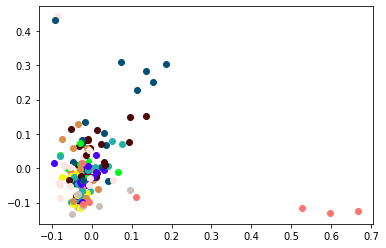

In [47]:
num_clusters = 10
num_seeds = 10
max_iterations = 300
labels_color_map = {
    0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1', 3: '#005073', 4: '#4d0404',
    5: '#ccc0ba', 6: '#4700f9', 7: '#f6f900', 8: '#00f91d', 9: '#da8c49'
}
pca_num_components = 2
tsne_num_components = 2

# calculate tf-idf of texts
tf_idf_vectorizer = TfidfVectorizer(analyzer="word", use_idf=True, smooth_idf=True, ngram_range=(2, 3))
tf_idf_matrix = tf_idf_vectorizer.fit_transform(tokens)

# create k-means model with custom config
clustering_model = KMeans(
    n_clusters=num_clusters,
    max_iter=max_iterations,
    precompute_distances="auto",
    n_jobs=-1
)

labels = clustering_model.fit_predict(tf_idf_matrix)
# print labels

X = tf_idf_matrix.todense()

# ----------------------------------------------------------------------------------------------------------------------

reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
# print reduced_data

fig, ax = plt.subplots()
for index, instance in enumerate(reduced_data):
    # print instance, index, labels[index]
    pca_comp_1, pca_comp_2 = reduced_data[index]
    color = labels_color_map[labels[index]]
    ax.scatter(pca_comp_1, pca_comp_2, c=color)
plt.show()

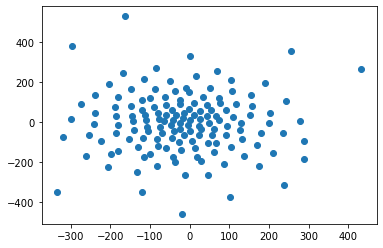

In [48]:
# t-SNE plot
embeddings = TSNE(n_components=tsne_num_components)
Y = embeddings.fit_transform(X)
plt.scatter(Y[:, 0], Y[:, 1], cmap=plt.cm.Spectral)
plt.show()